# **Deliverable 2: X-ray Imaging and Computed Tomography (CT)**

---

## Overview

This deliverable covers key concepts from **Lectures 13–18** (Weeks 6–7) of the course. You will explore:

- X-ray tube design and production
- Projection radiography geometry, contrast, and scatter reduction
- Digital X-ray detectors and image formation
- CT acquisition, reconstruction, image quality, and dose metrics
- Protocol design and optimization for clinical goals

You will engage with the material through conceptual questions, coding exercises, error analysis, and a design challenge. By the end of this deliverable, you will be able to analyze and simulate X-ray and CT imaging systems, interpret image quality trade-offs, optimize protocols, and apply quantitative reasoning to real-world clinical scenarios.

---

## Part 1: X-ray Production and Spectrum



### Key Concepts

- **X-ray Tube Physics:** X-rays are produced when high-speed electrons strike a metal target (anode), resulting in rapid deceleration (bremsstrahlung) and ejection of inner-shell electrons (characteristic X-rays). The output spectrum is a combination of continuous (bremsstrahlung) and discrete (characteristic) peaks.
- **Tube Voltage (kVp):** Sets the maximum photon energy; higher kVp increases beam penetration but reduces contrast.
- **Tube Current (mA):** Controls the number of electrons (and thus photons) produced per second; affects image brightness and patient dose.
- **Filtration:** Removes low-energy photons (which contribute to dose but not image quality), resulting in a "harder" (higher average energy) spectrum. The filtered spectrum $I(E)$ is zero for $E < E_{filter}$.
- **Anode Material:** Determines the energy of characteristic peaks (e.g., tungsten anode: 59 and 67 keV).


### 1.1 X-ray Tube Design Scenario

You are tasked with designing an X-ray tube for a pediatric chest radiography system. The goal is to minimize patient dose while maintaining diagnostic image quality.


### **Question 1**

- a)  Explain the roles of tube voltage (kVp) and tube current (mA) in shaping the X-ray spectrum and affecting patient dose.
- b) Describe how filtration and the choice of anode material influence the X-ray spectrum and image quality.
- c) Propose a set of tube parameters (kVp, mA, filtration) for pediatric imaging and justify your choices based on physical principles.


### **Coding Exercise 1**

1. Implement a function `simulate_xray_spectrum(kvp, e_filter)` that returns the energy (keV) and relative intensity arrays.
2. Plot the spectrum for kVp = 80, 100, 120 keV and E_filter = 30 keV.

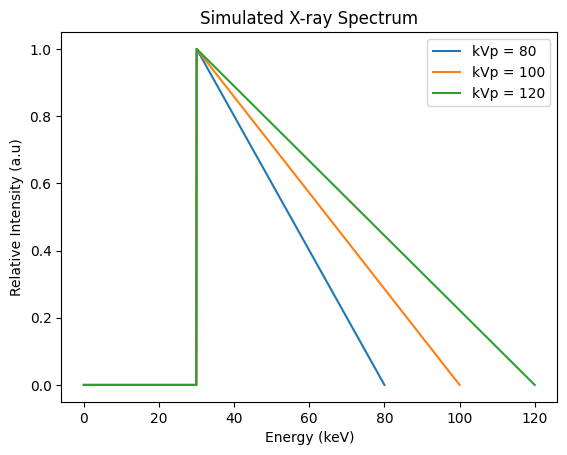

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# TODO: Simulate the X-ray spectrum
# spectrum = simulate_xray_spectrum(kvp, e_filter)
def simulate_xray_spectrum(kvp, e_filter):
    E = np.linspace(0, kvp, 1000)
    I = (kvp - E)
    I[E < e_filter] = 0
    if I.max() > 0:
      I = I / I.max()
    return E, I

# TODO: Plot the spectrum for different kVp and E_filter values
kvp_values = [80, 100, 120]
e_filter = 30

plt.figure()
for kvp in kvp_values:
    E, I = simulate_xray_spectrum(kvp, e_filter)
    plt.plot(E, I, label=f'kVp = {kvp}')
plt.xlabel('Energy (keV)')
plt.ylabel('Relative Intensity (a.u)')
plt.title('Simulated X-ray Spectrum')
plt.legend()


In [ ]:
# TODO: Analyze and discuss the results

# based on the results of the simulated spectrum function, we can see that as
# kVp value increases the maximum photon energy also increases, this is notably
# seen by the overall shift in the spectrum toward higher energy levels. the 30
# keV filter also supports this as its job is to remove low energy photons and
# harden the beam which is seen by the generated spectra following a linear path
# toward the detector rather than experiencing scatter.

---

## Part 2: CT Simulation, Error Analysis & Design

### Key Concepts

- Shepp-Logan Phantom: A digital test object for CT simulation.
- Sinogram: 2D plot of projection data as a function of angle and position.
- Image Reconstruction: Filtered backprojection and iterative methods.
- Error Analysis: Identifying and quantifying sources of error/artifacts in CT reconstruction.
- Design & Optimization: Creating and optimizing CT protocols for specific clinical goals.


### 2.1 Shepp-Logan Phantom and Sinogram

### **Coding Exercise 2**

- a) Generate a Shepp-Logan digital phantom in Python (use `skimage.data.shepp_logan_phantom` or custom code).
- b) Simulate CT projections (sinogram) of the phantom using the Radon transform.
- c) Reconstruct the image from the sinogram using filtered backprojection.


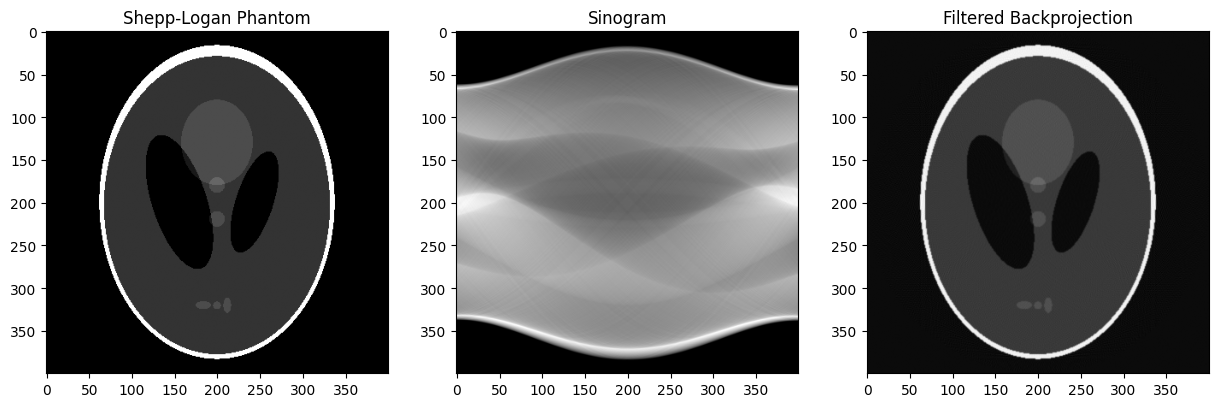

In [5]:
from matplotlib import axes
# TODO: Generate a Shepp-Logan phantom
# from skimage.data import shepp_logan_phantom
# phantom = shepp_logan_phantom()
from skimage.data import shepp_logan_phantom
phantom = shepp_logan_phantom()

# TODO: Simulate CT projections (sinogram) using the Radon transform
from skimage.transform import radon, iradon, resize
theta = np.linspace(0., 180., max(phantom.shape), endpoint=False)
sinogram = radon(phantom, theta=theta, circle=True)

# TODO: Reconstruct the image from the sinogram
recon_FBP = iradon(sinogram, theta=theta, circle=True)

# TODO: Visualize the phantom, sinogram, and reconstruction
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(phantom, cmap='gray')
axes[0].set_title('Shepp-Logan Phantom')
axes[1].imshow(sinogram, cmap='gray')
axes[1].set_title('Sinogram')
axes[2].imshow(recon_FBP, cmap='gray')
axes[2].set_title('Filtered Backprojection')

plt.show()


### 2.2 Error Analysis


### **Question 2**

- a) Identify and describe at least one source of error or artifact in your reconstructed image (e.g., limited projections, noise, motion, beam hardening).
- b) Quantify the impact of one error (e.g., measure reconstruction error as projections are reduced or noise is increased).
- c) Propose and implement a method to mitigate one artifact or error, and evaluate its effectiveness.


### **Coding Exercise 3**

Implement your method to mitigate an artifact or error and evaluate its effectiveness.

RMSE for full reconstruction: 0.03068635488592872
RMSE for reduced reconstruction (ramp filter): 0.13485764793966218
RMSE for reduced reconstruction (hann filter): 0.1087371023342161


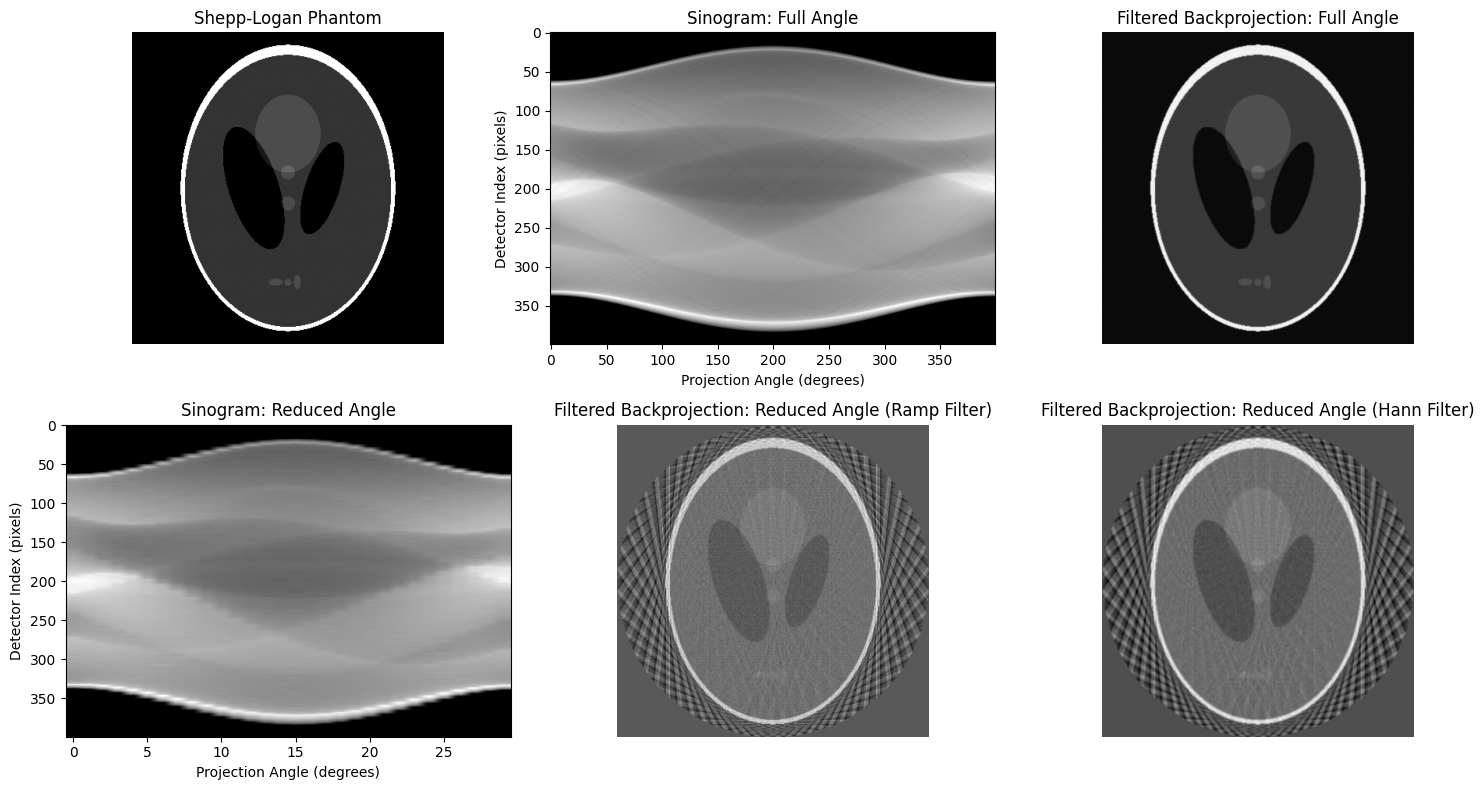

In [6]:
phantom = shepp_logan_phantom()

theta_full = np.linspace(0., 180., max(phantom.shape), endpoint=False)
sinogram_full = radon(phantom, theta=theta_full, circle=True)
recon_FBP_full = iradon(sinogram_full, theta=theta_full, circle=True)

# TODO: Implement a method to mitigate the artifact or error
def rmse(img1, img2):
    return np.sqrt(np.mean((img1 - img2) ** 2))

# 1. create error - use fewer projection angles
n_angles = 30
theta_reduced = np.linspace(0., 180., n_angles, endpoint=False)
sinogram_reduced = radon(phantom, theta=theta_reduced, circle=True)

# baseline reconstruction with more streaking
recon_FBP_reduced_ramp = iradon(sinogram_reduced, theta=theta_reduced, filter_name="ramp")

# window filter bc it reduces streaks/noise -> blur
recon_FBP_reduced_hann = iradon(sinogram_reduced, theta=theta_reduced, filter_name="hann")


# TODO: Evaluate and discuss the effectiveness of your method
rmse_full = rmse(phantom, recon_FBP_full)
rmse_reduced_ramp = rmse(phantom, recon_FBP_reduced_ramp)
rmse_reduced_hann = rmse(phantom, recon_FBP_reduced_hann)

print(f"RMSE for full reconstruction: {rmse_full}")
print(f"RMSE for reduced reconstruction (ramp filter): {rmse_reduced_ramp}")
print(f"RMSE for reduced reconstruction (hann filter): {rmse_reduced_hann}")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

axes[0, 0].imshow(phantom, cmap='gray')
axes[0, 0].set_title('Shepp-Logan Phantom')
axes[0, 0].axis('off')

axes[0, 1].imshow(sinogram_full, cmap='gray', aspect = 'auto')
axes[0, 1].set_title('Sinogram: Full Angle')
axes[0, 1].set_xlabel('Projection Angle (degrees)')
axes[0, 1].set_ylabel('Detector Index (pixels)')

axes [0, 2].imshow(recon_FBP_full, cmap='gray')
axes[0, 2].set_title('Filtered Backprojection: Full Angle')
axes [0,2].axis('off')

axes[1, 0].imshow(sinogram_reduced, cmap='gray', aspect = 'auto')
axes[1, 0].set_title('Sinogram: Reduced Angle')
axes[1, 0].set_xlabel('Projection Angle (degrees)')
axes[1, 0].set_ylabel('Detector Index (pixels)')

axes[1,1].imshow(recon_FBP_reduced_ramp, cmap='gray')
axes[1,1].set_title('Filtered Backprojection: Reduced Angle (Ramp Filter)')
axes[1, 1].axis('off')

axes[1,2].imshow(recon_FBP_reduced_hann, cmap='gray')
axes[1,2].set_title('Filtered Backprojection: Reduced Angle (Hann Filter)')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### 2.3 CT Protocol Design & Optimization


### **Question 3**

- a) Choose a clinical goal (e.g., maximize nodule detectability, minimize dose).
- b) Optimize acquisition parameters (number of projections, rotation angles, detector size, noise level) to achieve your goal.
- c) Justify your design choices based on physical principles and clinical needs.
- d) Reflect on the trade-offs and limitations of your design.


---

## Part 3: Projection Radiography & Image Quality



### Key Concepts

- **Scatter:** Primarily due to Compton interactions; scattered photons degrade image contrast by adding unwanted background signal. Scatter increases with patient thickness and field size. (See Lecture 14)
- **Geometric Unsharpness ($U_g$):** Caused by the finite size of the X-ray source.
- **Contrast Degradation:** The scatter-to-primary ratio (SPR) quantifies the amount of scatter relative to primary photons. Higher SPR means lower contrast. Contrast degradation factor:

$$C_{degraded} = \frac{C_{ideal}}{1 + SPR}$$
- **Scatter Reduction:** Use of grids, air gaps, or collimation can reduce scatter but may increase dose or reduce signal.


### 3.1 Scatter and Contrast


### **Questions 4**

- a) Explain the physical origin of scatter in projection radiography and its impact on image contrast.
- b) Describe two methods to reduce scatter and discuss their trade-offs.
- c) Calculate the contrast degradation factor if the scatter-to-primary ratio (SPR) is 1.5. What percent of the original contrast remains?


### **Coding Exercise 4**

1. Implement `geometric_unsharpness(f, a, b)`.
2. Plot $U_g$ as a function of $b$ for $f=1$ mm, $a=100$ cm, and $b$ from 0 to 20 cm.

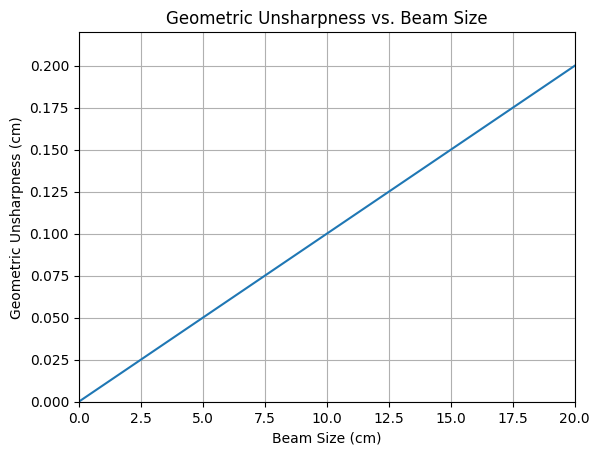

In [28]:
# TODO: Implement geometric_unsharpness(f, a, b)
def geometric_unsharpness(f, a, b):
  """
  geometric unsharpness: U_g = f * (b/a)
  f: focal spot size (mm)
  a: aperture size (cm)
  b: beam size (cm)
  return: geometric unsharpness (cm)
  """
  return f * (b/a)

# TODO: Plot U_g as a function of b

f = 1.0
a = 100.0
b_values = np.linspace(0, 20, 100)

ug_values = geometric_unsharpness(f, a, b_values)

plt.figure()
plt.plot(b_values, ug_values)
plt.xlabel('Beam Size (cm)')
plt.ylabel('Geometric Unsharpness (cm)')
plt.title('Geometric Unsharpness vs. Beam Size')
plt.xlim(0, 20)
plt.ylim(0, max(ug_values) * 1.1)
plt.grid(True)
plt.show()

### 3.2 Quantitative Comparison of Scatter Reduction Techniques


### **Questions 5**

- a) For each technique, calculate the percent contrast improvement using the contrast degradation formula.
- b) Summarize your findings: Which technique is most effective? What are the trade-offs (e.g., dose, practicality, image artifacts)?

### 3.3 Simulating Scatter Effects and Grid Optimization

### **Coding Exercise 5**

In this exercise, you will simulate the effect of scatter on a simple X-ray image and explore how grid design can optimize image contrast.

**Scenario:**
You are given a 1D 'image' (e.g., a step function representing an object) and must model the effect of scatter as an additive background proportional to the primary signal. You will then simulate the use of an anti-scatter grid with variable grid ratio to reduce scatter, and determine the optimal grid ratio for maximizing contrast while considering signal loss.

**Tasks:**
1. Simulate the effect of scatter on a simple 1D object (e.g., a step function) by adding a scatter component proportional to the primary signal using the fixed SPR value.
2. Model the impact of an anti-scatter grid: for each grid ratio $G$, reduce scatter by $1/(1+G)$ and primary signal by $T_p$ (e.g., $T_p = 1 - 0.02 \times G$).
3. Plot image contrast as a function of grid ratio for the fixed SPR, and identify the grid ratio that maximizes contrast.

**Hints:**
- Use matplotlib for plotting.
- You may assume a fixed SPR value (e.g., SPR = 1.5).
- You may define contrast as $(I_{max} - I_{min})/(I_{max} + I_{min})$ for the detected signal.
- You may use a simple linear model for $T_p(G)$, e.g., $T_p = 1 - 0.02 	imes G$ (for $G$ from 0 to 12).

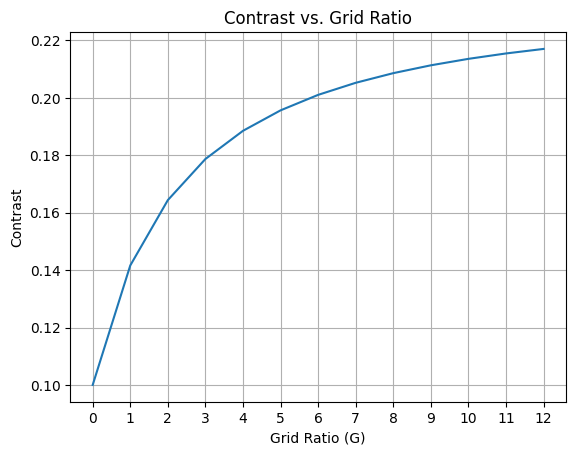

Optimal grid ratio (G) for maximizing contrast: 12
Maximum contrast: 0.2170


In [31]:
# TODO: Simulate scatter and grid optimization for a 1D image
SPR = 1.5
G_vals = np.arange(0, 13)
n = 400

p = np.ones(n, dtype=float)
p[:n//2] = 0.6
p[n//2:] = 1.0

S = SPR * np.mean(p) * np.ones_like(p)

I_no_grid = p + S

contrasts = []

for G in G_vals:
    T_p = 1 - 0.02 * G
    T_p = max(T_p, 0.0)

    S_grid = S / (1 + G)

    I_grid = T_p * p + S_grid

    I_max = I_grid.max()
    I_min = I_grid.min()
    contrast = (I_max - I_min) / (I_max + I_min)
    contrasts.append(contrast)

# TODO: Plot and analyze the effect of grid ratio on contrast
plt.figure()
plt.plot(G_vals, contrasts)
plt.xlabel('Grid Ratio (G)')
plt.ylabel('Contrast')
plt.title('Contrast vs. Grid Ratio')
plt.xticks(G_vals)
plt.grid(True)
plt.show()

best_idx = int(np.argmax(contrasts))
best_G = int(G_vals[best_idx])
print(f"Optimal grid ratio (G) for maximizing contrast: {best_G}")
print(f"Maximum contrast: {contrasts[best_idx]:.4f}")
# TODO: Discuss your findings and trade-offs
# based on my findings, as grid ratio increases scatter contribution decreases,
# which would result in improved image contrast. we can see the most significant
# improvement at lower grid ratios because that is where scatter reduction
# dominates. at higher ratios contrast associated gains diminish due to the
# increase of loss of primary signal transmission. although my model shows
# max contrast at the highest grid ratio, clinical considerations such as
# increased dose exposure and noise would limit the optimal grid ratio that
# can be realistically achieved.

---

## Part 4: X-ray Detectors & Quantum Efficiency



### Key Concepts

- **Quantum Efficiency (QE):** The fraction of incident X-ray photons detected and converted to signal. Higher QE improves SNR and allows for lower patient dose.

$$QE = \frac{\text{Detected photons}}{\text{Incident photons}}$$
- **Detective Quantum Efficiency (DQE):** Describes how well a detector preserves SNR across spatial frequencies.

$$DQE(f) = \frac{(SNR_{out}(f))^2}{(SNR_{in}(f))^2}$$
- **Readout Noise:** Electronic noise added during signal readout; becomes significant at low doses or for low-signal regions.
- **Detector Types:** Indirect (scintillator + photodiode) and direct (photoconductor) detectors have different QE and noise characteristics.


### 4.1 Detector Selection Scenario

### **Questions 6**

You are comparing two digital X-ray detectors for a trauma imaging suite:

   1.  Detector A: High quantum efficiency (QE), moderate readout noise
   2. Detector B: Lower QE, but very low readout noise

- a) Define quantum efficiency and explain its importance for image quality and dose.
- b) Discuss the trade-offs between quantum efficiency and readout noise for low-dose imaging.
- c) Which detector would you recommend for pediatric trauma imaging and why?


### **Coding Exercise 6**

1. Modify the code to add a third detector (Detector C) with your own parameters for SNR_out_C.
2. Plot and compare the DQE for all three detectors.
3. Briefly discuss how your changes affect the DQE curves.

In [ ]:
# Questions - Answers
# a)
  # quantum efficiency is defined as the fraction of total photons detected
  # divided by the photons that are actually captured by the detector
  # (incident photons) and converted into useful signal.
  # in terms of image quality and dose, higher QE values means that fewer
  # photons are wasted and therefore you get better SNR values for the
  # same dose or lower. this relationship is why QE is so important for both
  # image quality and dose, because lower waste means less exposure time.
# b)
  # because at lower doses the number of overall detected photons will also be
  # lower, that means the quantum or Poisson noise is going to be high. readout
  # noise is extra electronic noise that at lower doses can dominate and erase
  # subtle contrast differences, this is especially valid for low signal regions
  # to mitigate this you can increase QE which means increase detected photons
  # and subsequently increase SNR which will reduce quantum noise. for readout
  # noise you would want low levels of readout noise which will help with the
  # electronics bottleneck. the best choice for mitigation depends on which type
  # of noise is dominating the system.
# c)
  # for pediatric trauma imaging i would choose Detector A, because the nature
  # of pediatrics has to be very dose sensitive and having a higher QE value
  # allows you to maintain a decent SNR at a lower exposure for the patient.
  # lowest dose that still keeps SNR in acceptable ranges, therefore high QE.


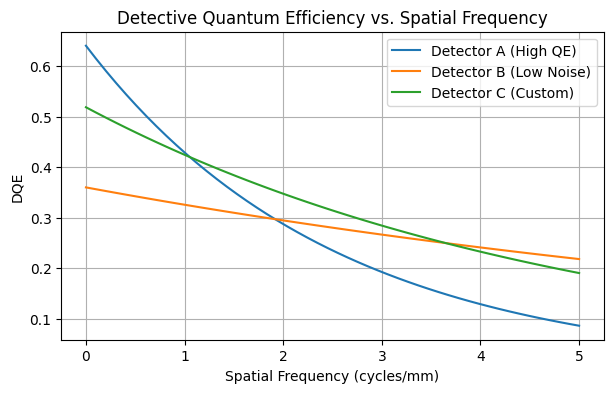

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def compute_dqe(snr_in, snr_out):
    return (snr_out ** 2) / (snr_in ** 2)

# Example data for two detectors
spatial_freq = np.linspace(0, 5, 50)  # cycles/mm
snr_in = 100 * np.exp(-0.2 * spatial_freq)

snr_out_A = 80 * np.exp(-0.4 * spatial_freq)  # High QE, moderate noise
snr_out_B = 60 * np.exp(-0.25 * spatial_freq)  # Lower QE, low noise

snr_out_C = 72 * np.exp(-0.3 * spatial_freq)

# Compute DQE for each detector
dqe_A = compute_dqe(snr_in, snr_out_A)
dqe_B = compute_dqe(snr_in, snr_out_B)
dqe_C = compute_dqe(snr_in, snr_out_C)



plt.figure(figsize=(7,4))
plt.plot(spatial_freq, dqe_A, label='Detector A (High QE)')
plt.plot(spatial_freq, dqe_B, label='Detector B (Low Noise)')
plt.plot(spatial_freq, dqe_C, label='Detector C (Custom)')
plt.xlabel('Spatial Frequency (cycles/mm)')
plt.ylabel('DQE')
plt.title('Detective Quantum Efficiency vs. Spatial Frequency')
plt.legend()
plt.grid(True)
plt.show()

# TODO: Briefly discuss how your changes affect the DQE curves.

# Detector A shows the lowest DQE frequency because it has the highest quantum
# efficiency but it degrades faster at higher spatial frequency.
# Detector B has a lower low frequency DQE but it is able to maintain
# performance better at higher values compared to Detector A.
# Detector C shows a middle ground in terms of behaviour, balancing both
# quantum efficiency and spatial frequency response - this was done purposely
# as I selected values for C that were in the middle of the ranges of A and B.
# the behaviour of the DQE curves is consistent with the trade-off between
# photon absorption efficiency and preservation of fine details.

### **Coding Exercise 7**

1. Display the original image.
2. Apply contrast enhancement.
3. Apply brightness adjustment.
4. Display the adjusted images side-by-side.
5. Discuss how these changes affect image quality and visibility of features.

--2026-02-27 02:26:30--  https://raw.githubusercontent.com/julianamassaro/BMEN509-623_Deliverable_2/a9f01259c9c72af1651e325271befc7e7a64040b/data/Xray_Chest.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1659968 (1.6M) [image/png]
Saving to: ‘data/Xray_Chest.png’

data/Xray_Chest.png 100%[===================>]   1.58M  --.-KB/s    in 0.02s   

2026-02-27 02:26:30 (91.4 MB/s) - ‘data/Xray_Chest.png’ saved [1659968/1659968]



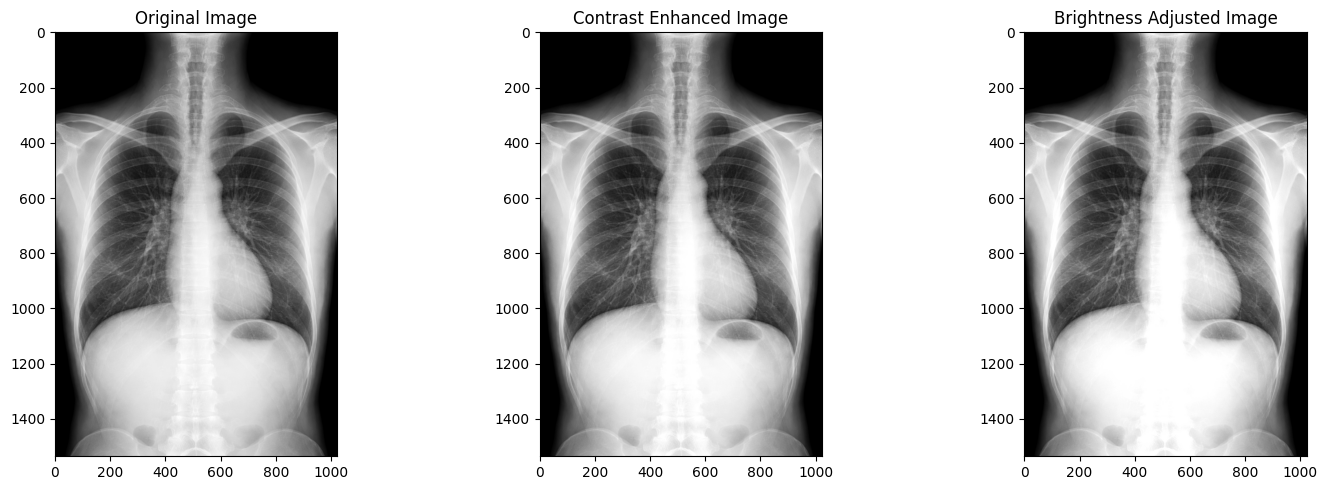

In [14]:
#USE IMAGE 'Xray_Chest.png'
from PIL import Image

import os
if not os.path.exists('data'):
    os.makedirs('data')

!wget -O data/Xray_Chest.png https://raw.githubusercontent.com/julianamassaro/BMEN509-623_Deliverable_2/a9f01259c9c72af1651e325271befc7e7a64040b/data/Xray_Chest.png
img = Image.open('data/Xray_Chest.png').convert('L')
I = np.asarray(img).astype(np.float32)

# TODO: Apply contrast enhancement
p2, p98 = np.percentile(I, (2, 98))
I_contrast = np.clip((I - p2)/ (p98 - p2 + 1e-6), 0, 1)

# TODO: Apply brightness adjustment
I_brightness = 0.05
I_adjusted = np.clip(I_contrast + I_brightness, 0, 1)

# TODO: Display the original and adjusted images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(I, cmap='gray')
axes[0].set_title('Original Image')

axes[1].imshow(I_contrast, cmap='gray')
axes[1].set_title('Contrast Enhanced Image')

axes[2].imshow(I_adjusted, cmap='gray')
axes[2].set_title('Brightness Adjusted Image')

plt.tight_layout()
plt.show()

# TODO: Discuss the effects below

# contrast enhancement improved the visualization of the lung border markings
# and soft tissue boundary by expanding the meaningful intensity range.
# brightness adjustment uniformly increased the intensity of the pixels -
# improving visibility in darker regions but at the cost of partial saturation
# in structures that were already bright to begin with like the diaphragm.
# these effects correlate with the trade-off between enhancing visibility
# and preservation of the dynamic range.


---

## Part 5: Computed Tomography (CT) Principles & Image Reconstruction



### Key Concepts

- **Hounsfield Units (HU):** Quantifies tissue attenuation relative to water.

$$HU = 1000 \cdot \frac{\mu_{tissue} - \mu_{water}}{\mu_{water}}$$
- **CT Projections:** Each projection is a line integral of attenuation coefficients along a path through the object:

$$P(\theta, t) = \int \mu(x, y) ds$$
- **Sinogram:** A 2D plot of projection data as a function of angle and position; each point in the object traces a sinusoidal path in the sinogram.
- **Image Reconstruction:** Filtered backprojection and iterative methods reconstruct the 2D image from projections.


### 5.1 Hounsfield Units and Tissue Contrast


### **Questions 7**

- a)  Define the Hounsfield unit and explain how it is calculated from measured attenuation coefficients.
- b) Calculate the HU for a tissue with:

$$
\mu_{\text{tissue}} = 0.22\ \text{cm}^{-1}, \quad
\mu_{\text{water}} = 0.20\ \text{cm}^{-1}, \quad
\mu_{\text{air}} = 0.0002\ \text{cm}^{-1}
$$

Show your calculation step by step.

- c) Discuss the clinical significance of HU values in CT imaging.


### **Coding Exercise 8**

1. Create a 2D numpy array representing a phantom with a circular region of higher attenuation.
2. Simulate the projection (sum of attenuation) at a given angle.
3. Plot the phantom and its projection profile.

In [ ]:
# TODO: Create a 2D numpy array phantom with a circular region
# ...

# TODO: Simulate the projection (sum of attenuation) at a given angle
# ...

# TODO: Plot the phantom and its projection profile
# ...

---

## Part 6: CT Image Quality, Artifacts, and Dose Optimization



### Key Concepts

- **Streak Artifacts:** Appear as bright/dark lines, often caused by high-attenuation objects (metal), beam hardening (lower energy photons absorbed more), or photon starvation (very low signal).
- **Noise:** In CT, noise is primarily quantum (photon) noise and is inversely proportional to the square root of dose:

$$\sigma = \frac{K}{\sqrt{D}}$$
- **Dose Optimization:** The goal is to minimize patient dose while maintaining diagnostic image quality. Techniques include automatic exposure control and iterative reconstruction.


### 6.1 CT Streak Artifact Analysis

### **Questions 8**

- a) Carefully examine the artifact in the image. Describe the physical and mathematical causes of streak artifacts in CT (reference concepts such as beam hardening, photon starvation, and reconstruction errors).
- b) Propose and explain at least two algorithmic or acquisition-based strategies to reduce or mitigate streak artifacts in clinical CT.


### **Coding Exercise 9**

1. Write a function `ct_noise_vs_dose(D, K)`.
2. Plot image noise as a function of dose for $K=10$ and $D$ from 1 to 100 (arbitrary units).

In [ ]:
# USE IMAGE 'Brain_CT.png'

# TODO: Write a function ct_noise_vs_dose(D, K)
# def ct_noise_vs_dose(D, K):
#     ...

# TODO: Plot image noise as a function of dose
# ...

# TODO: Analyze and discuss the results
# ...

---

## Part 7: Quantitative Analysis of CT Image Quality

### Key Concepts

- **SNR (Signal-to-Noise Ratio):**

$$\mathrm{SNR} = \frac{\mu_{signal}}{\sigma_{noise}}$$
- **RMSE (Root Mean Square Error):** Measures the average difference between two images:

$$RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^N (I_i - I_{ref,i})^2}$$
- **Filtering:** Denoising filters (Gaussian, median, bilateral) can reduce noise but may blur edges or reduce detail.


### 7.1 SNR and RMSE Analysis


### **Coding Exercise 10**

1. Apply a denoising or edge-preserving filter of your choice (e.g., Gaussian, median, or bilateral filter).
2. Compute and compare the following metrics before and after filtering:
   - Signal-to-Noise Ratio (SNR)
   - Root Mean Square Error (RMSE)
   (You may use the original image as reference for RMSE, or compare to a region of interest.)
3. Discuss what these metrics reveal about image quality and the impact of filtering.

In [ ]:
# USE IMAGE 'Brain_CT.png'

# TODO: Apply a filter to img (e.g., Gaussian, median, etc.)
# filtered_img = ...

# TODO: Compute SNR and RMSE before and after filtering
# snr_before = ...
# snr_after = ...
# rmse = ...

# TODO: Visualize the original and filtered images
# ...

---

## **<u>Submission Requirements</u>**

**You must submit TWO files to D2L:**

1. **Jupyter Notebook** (`.ipynb`): Your completed notebook with all code, outputs, and written analysis. All cells must be executed in order.

2. **PDF Export** (`.pdf`): Export your notebook to PDF (File → Export as PDF, or print to PDF). Verify all figures and equations render correctly.

**Important:** All answers must be completed directly in this Jupyter notebook.

**File naming convention:** `LastName_FirstName_Deliverable2.ipynb` and `.pdf`

**Due:** Monday, March 2, 2026 at 11:59 PM

---

## Submission Summary

| Section | Questions/Analysis Due |
|---------|------------------------|
| **Part 1: X-ray Production & Spectrum** | Q1 (a,b,c), Coding Exercise 1 |
| **Part 2: CT Simulation, Error Analysis & Design** | Coding Exercise 2, Q2 (a,b,c), Coding Exercise 3, Q3 (a,b,c,d)  |
| **Part 3: Projection Radiography & Image Quality** | Q4 (a,b,c), Coding Exercise 4, Q5 (a,b), Coding Exercise 5 |
| **Part 4: X-ray Detectors & Quantum Efficiency** | Q6 (a,b,c), Coding Exercise 6, Coding Exercise 7|
| **Part 5: CT Principles & Image Reconstruction** | Q7 (a,b,c), Coding Exercise 8|
| **Part 6: CT Image Quality, Artifacts & Dose Optimization** | Q8 (a,b), Coding Exercise 9 |
| **Part 7: Quantitative Analysis of CT Image Quality** | Coding Exercise 10 |
